# Use the data set named Amsterdam.json. This data is about the prices of properties listed on AirBnB. You work for a content marketing company. Your company is doing a story on Amsterdam, one of the components of this report will be about the accessibility of affordable accommodation in the city and about, what factors influence, the prices. Your task is to assist in relevant data analysis. Keeping this context in mind, answer the questions that follow:

# Questions should be answered in the given sequence, as they are interrelated.

In [1]:
# Important lib
import pandas as pd
import matplotlib.pyplot as plt 
# data viz lib
import seaborn as sns 
# data viz lib
import numpy as np 
# numeric python

# Read the data set named, Amsterdam.json

In [2]:
ams = pd.read_json('D:\\Datasets\\amsterdam.json').sort_index()


## 1. The number of rows in the raw file is …………..

In [3]:
ams.shape

(15181, 13)

## 2. Is the column named “Bathroom” in the data?

In [4]:
ams.columns

Index(['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'guests_included', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'price', 'latitude', 'longitude',
       'room_type', 'instant_bookable'],
      dtype='object')

## 3. Column named as “bedrooms” has 12 missing values?

In [5]:
ams.isnull().sum()

host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64

## 4. The variable latitude is a numeric variable in the dataframe you just read in

In [6]:
ams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15181 entries, 0 to 15180
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_listings_count             15178 non-null  float64
 1   accommodates                    15181 non-null  int64  
 2   bathrooms                       15163 non-null  float64
 3   bedrooms                        15169 non-null  float64
 4   guests_included                 15181 non-null  int64  
 5   minimum_nights                  15181 non-null  int64  
 6   number_of_reviews               15181 non-null  int64  
 7   calculated_host_listings_count  15181 non-null  int64  
 8   price                           15181 non-null  object 
 9   latitude                        15181 non-null  float64
 10  longitude                       15181 non-null  float64
 11  room_type                       15181 non-null  object 
 12  instant_bookable                

In [7]:
ams.describe()

host_listings_count  accommodates     bathrooms      bedrooms  \
count         15178.000000  15181.000000  15163.000000  15169.000000   
mean              3.404994      2.917858      1.122832      1.412222   
std              11.324173      1.404973      0.356547      0.885127   
min               0.000000      1.000000      0.000000      0.000000   
25%               1.000000      2.000000      1.000000      1.000000   
50%               1.000000      2.000000      1.000000      1.000000   
75%               1.000000      4.000000      1.000000      2.000000   
max             106.000000     17.000000      8.000000     10.000000   

       guests_included  minimum_nights  number_of_reviews  \
count     15181.000000    15181.000000       15181.000000   
mean          1.516106        2.882551          17.785456   
std           1.004709        7.215722          34.747999   
min           1.000000        1.000000           0.000000   
25%           1.000000        2.000000           2.000000   
50%           1.000000        2.000000           7.000000   
75%           2.000000        3.000000          18.000000   
max          16.000000      523.000000         496.000000   

       calculated_host_listings_count      latitude     longitude  
count                    15181.000000  15181.000000  15181.000000  
mean                         2.934787     52.365353      4.889025  
std                          8.968696      0.015738      0.034901  
min                          1.000000     52.290308      4.753513  
25%                          1.000000     52.355616      4.865016  
50%                          1.000000     52.365028      4.886344  
75%                          1.000000     52.374829      4.907857  
max                         91.000000     52.426224      5.027689

In [8]:
ams.bedrooms.isnull().sum()

12

In [9]:
ams.bedrooms.describe()

count    15169.000000
mean         1.412222
std          0.885127
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: bedrooms, dtype: float64

## 5.The average value of price column is? (Round your answer to 3 decimal places using round

In [10]:
ams.price = ams.price.str.replace('$','')
ams.price = ams.price.str.replace(',','')

In [11]:
ams.price = pd.to_numeric(ams.price)

In [12]:
round(ams.price.mean(),3)

134.799

## 6. The maximum value in the price column is? (Rounded to 1 decimal place, use round

In [13]:
round(ams.price.max(),1)

3142.0

## 7. What is the 99th percentile in the price column? (Rounded to 1 decimal place, use round

In [14]:
round(ams.price.quantile(0.99),1)

440.0

In [15]:
ams_bkup = ams.copy()

In [16]:
ams_bkup.shape

(15181, 13)

## 8. Remove all the rows, where values in the price column are more than 440.0. What is the 90th percentile now? (Round your answer to 1 decimal point, use round

In [17]:
idx_nm = ams[ams.price>440].index
ams.drop(idx_nm, inplace = True)
round(ams.price.quantile(0.90),1)

210.0

## 9. Drop all the missing values in the data. How many rows are now left in the data?

In [18]:
ams.shape

(15031, 13)

In [19]:
ams.dropna(inplace=True)
ams.shape[0]

14998

In [20]:
# ams = ams.dropna()
# ams.isnull().sum()
# ams.shape

## 10. One of the key points, that folks at your company want to know is, if prices differ as a function of their distance from city centre.

 

### Write a function to find the distance of all the observations in your data from the city centre in km units. You can assume that the city centre has a latitude = 52.379189 and longitude = 4.899431. You can find out distances using haversine formula, you can read more about it here https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas (Links to an external site.). Once you have applied the haversine transform, create a new column named “d_centre”, arrange your data by distance in ascending order. The second booking in this sorted list has a price of (round to 1 decimal place)

In [21]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km


In [22]:
latitude = 52.379189 
longitude = 4.899431

In [23]:
ams['d_centre'] = haversine_np(longitude,latitude,ams['longitude'],ams['latitude'])

In [24]:
ams.d_centre

0        2.987199
1        2.885443
2        2.919191
3        3.168346
4        2.876726
           ...   
15176    8.276861
15177    2.317796
15178    6.617735
15179    5.784084
15180    9.023060
Name: d_centre, Length: 14998, dtype: float64

In [25]:
ams = ams.sort_values(by ='d_centre')

In [26]:
ams.head(2)

host_listings_count  accommodates  bathrooms  bedrooms  guests_included  \
3158                  1.0             2        1.5       1.0                1   
3168                  1.0             4        1.0       1.0                1   

      minimum_nights  number_of_reviews  calculated_host_listings_count  \
3158               1                  0                               1   
3168               1                  0                               1   

      price   latitude  longitude     room_type instant_bookable  d_centre  
3158   85.0  52.378546   4.900775  Private room                f  0.115801  
3168   41.0  52.378850   4.901433   Shared room                f  0.140946

In [27]:
# round(ams[(ams['d_centre']<=1) & (ams['room_type']=='Private room')]['price'].mean(), 1)

## 11. The average price of Private Rooms that are within 1 km from city centre is (Round to 1 decimal place)

In [28]:
ams_PR = ams.loc[ams.d_centre <=1 & (ams['room_type'] == 'Private room')]
round(ams_PR.price.mean(),1)

118.1

## 12. Now that you have done some initial data exploration and feature engineering, its time now, to build a regression model. Before you start building a regression model, you will need to prepare your data.

## Create a predictor matrix X, after creating dummies for categorical data. How many columns X will have?

In [29]:
X = pd.get_dummies(ams.drop(['price' ,'latitude', 'longitude'], axis=1), drop_first=True)
y = ams['price']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 3158 to 6764
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_listings_count             14998 non-null  float64
 1   accommodates                    14998 non-null  int64  
 2   bathrooms                       14998 non-null  float64
 3   bedrooms                        14998 non-null  float64
 4   guests_included                 14998 non-null  int64  
 5   minimum_nights                  14998 non-null  int64  
 6   number_of_reviews               14998 non-null  int64  
 7   calculated_host_listings_count  14998 non-null  int64  
 8   d_centre                        14998 non-null  float64
 9   room_type_Private room          14998 non-null  uint8  
 10  room_type_Shared room           14998 non-null  uint8  
 11  instant_bookable_t              14998 non-null  uint8  
dtypes: float64(4), int64(5), uint8

In [30]:
ams_final = pd.get_dummies(ams)
ams_final.shape

(14998, 17)

In [31]:
X = ams_final.drop("price", axis=1)
y = ams_final.price

In [32]:
X.shape

(14998, 16)

## 13. Partition your data into train and test sets, Use a random_state=200.(sklearn.model_selection.train_test_split()) to split your data into 70% train set and 30% test set. How many records will be there in train and test set?

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

In [35]:
X_train.shape

(10498, 16)

In [36]:
X_test.shape

(4500, 16)

## 14. Now create an ensemble regressor model, use a RandomForestRegressor, to build and finalize a model. Do a grid search on n_estimators, with a grid of [30,40,50,60,70,………………600]. Keep a random_state of 200 (for reproducibility of results). Use OOB to tune. Keep max_features=”sqrt”


## The three most informative factors, determining price are:
## (Hint: OOB score measures, R^2 , higher the oob score (in regression setting), better is the model)

 

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [38]:
# seq = list(range(30,600,10))

In [39]:
# rf = RandomForestRegressor(random_state = 200, max_features='sqrt', oob_score=True)
# grid = GridSearchCV(rf, param_grid = {'n_estimators':seq}, cv=3)
# grid.fit(X_train,y_train)

In [40]:
model_RFR = RandomForestRegressor(random_state=200, max_features='sqrt', oob_score= True)
model_RFR.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', oob_score=True, random_state=200)

In [41]:
y_pred = model_RFR.predict(X_test)

In [42]:
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 600, num = 10)]
max_features= 'sqrt'
grid = GridSearchCV(model_RFR, param_grid= {'n_estimators':n_estimators}, cv=3)

In [43]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_features='sqrt',
                                             oob_score=True, random_state=200),
             param_grid={'n_estimators': [30, 93, 156, 220, 283, 346, 410, 473,
                                          536, 600]})

In [44]:
grid.best_params_

{'n_estimators': 600}

In [45]:
model_RFR_tune = RandomForestRegressor( n_estimators=600, random_state=200, max_features='sqrt', oob_score= True)
model_RFR_tune.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=600, oob_score=True,
                      random_state=200)

In [46]:
oob=model_RFR_tune.oob_score_

In [47]:
oob

0.5635556469018473

In [48]:
pd.Series(model_RFR_tune.feature_importances_, index = X_train.columns).sort_values(ascending=False)


accommodates                      0.183107
d_centre                          0.128062
bedrooms                          0.127043
longitude                         0.116544
latitude                          0.105703
number_of_reviews                 0.060220
guests_included                   0.058569
bathrooms                         0.048143
room_type_Entire home/apt         0.044069
minimum_nights                    0.036645
room_type_Private room            0.031056
calculated_host_listings_count    0.023986
host_listings_count               0.022365
instant_bookable_t                0.006957
instant_bookable_f                0.006730
room_type_Shared room             0.000800
dtype: float64

## 15. To find out how good our model is in accurately predicting the price, we will asses its performance out of sample, on our test dataset.


## Create a scatter between, actual price and error. Based on this scatter, will you be more confident about predictions where actual price is less than 200?(Hint: Look at the variability in predictions across the price range)

 

In [49]:
y_pred_tune = model_RFR_tune.predict(X_test)

In [50]:
y_pred_tune

array([166.81833333,  99.74166667, 105.92333333, ..., 101.30033333,
        88.47166667, 104.28666667])

In [51]:
type(y_pred_tune)

numpy.ndarray

In [52]:
type(y_test)

pandas.core.series.Series

In [53]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.5531139202632558


In [54]:
ams_error = np.abs(y_test-y_pred_tune)
ams_error.describe()

count    4500.000000
mean       30.108769
std        29.991196
min         0.001667
25%        10.543750
50%        21.836667
75%        39.537083
max       255.991667
Name: price, dtype: float64

C:\Users\anshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 300.0)

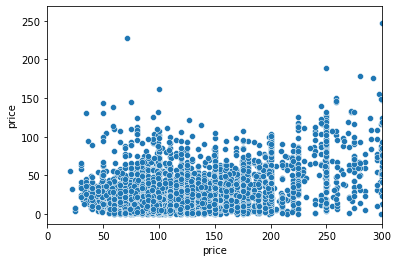

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(y_test,ams_error)
plt.xlim(0,300)

## Inference :- As we can see that the error is random in nature below 200 price,therefore we can say that it is homoscdastic in nature , so we are more confident about our prediction.